In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps
from numpy import *
import pickle
from tensorflow.keras import activations

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from keras.models import Sequential
import tensorflow as tf
from keras.layers import Conv2D,MaxPooling2D, MaxPool2D, AveragePooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow import keras
from keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics

#Import Data

In [60]:
def import_data(datapath):  

  fruitTrain = os.listdir(datapath)
  print(fruitTrain)

  fruitlist = []
  labels = []
  for fruit in fruitTrain:
    fruitPath = datapath +'/'+ fruit
    images = os.listdir(fruitPath)
    index = fruitTrain.index(fruit)
    for image in images:
      fruitlist.append(array(Image.open(fruitPath + '/' + image).resize((224, 224)).convert('RGB')))
      labels.append(index)
      #print(fruitPath + '/' + image)
  print(array(fruitlist).shape)
  print(array(labels).shape)
  dataset = {'images':array(fruitlist), 'classes':array(labels), 'class_names': fruitTrain}
  return dataset

In [58]:
trainingPath = '/content/drive/MyDrive/FruitDataAI/TrainingData'
dataset = import_data(trainingPath)
print(dataset.keys())


['00_Tao_My', '01_Tao_TQ', '02_Nho_Do_VN', '03_Nho_Xanh_VN', '04_Nho_Do_TQ', '05_Nho_Xanh_TQ', '06_Khoai_Tay_VN', '07_Khoai_Tay_TQ']
(882, 224, 224, 3)
(882,)
dict_keys(['images', 'classes', 'class_names'])


In [77]:
testingPath = '/content/drive/MyDrive/FruitDataAI/TestingData'
dataset_test = import_data(testingPath)
print(dataset_test.keys())

['0001TAOMY', '0001TAOTRUNGQUOC', '0002NHODOVIETNAM', '0002NHOXANHVIETNAM', '0002NHODOTRUNGQUOC', '0002NHOXANHTRUNGQUOC', '0003KHOAITAYVIETNAM', '0003KHOAITAYTQ']
(193, 224, 224, 3)
(193,)
dict_keys(['images', 'classes', 'class_names'])


In [62]:
#Save loaded data
pickle.dump(dataset, open('/content/drive/MyDrive/FruitDataAI/LoadData/data_set.pkl', 'wb'))

In [78]:
#Save loaded data
pickle.dump(dataset_test, open('/content/drive/MyDrive/FruitDataAI/LoadData/data_set_test.pkl', 'wb'))

#Load data

In [3]:
fruits = os.listdir('/content/drive/MyDrive/FruitDataAI/TrainingData')
print(fruits)

['00_Tao_My', '01_Tao_TQ', '02_Nho_Do_VN', '03_Nho_Xanh_VN', '04_Nho_Do_TQ', '05_Nho_Xanh_TQ', '06_Khoai_Tay_VN', '07_Khoai_Tay_TQ']


In [64]:
fruits_test = os.listdir('/content/drive/MyDrive/FruitDataAI/TestingData')
print(fruits)

['00_Tao_My', '01_Tao_TQ', '02_Nho_Do_VN', '03_Nho_Xanh_VN', '04_Nho_Do_TQ', '05_Nho_Xanh_TQ', '06_Khoai_Tay_VN', '07_Khoai_Tay_TQ']


In [67]:
dataset = pickle.load(open('/content/drive/MyDrive/FruitDataAI/LoadData/data_set.pkl','rb'))
print(dataset.keys())
images = dataset['images']
labels = dataset['classes']
class_names = dataset['class_names']
print(images.shape)
print(labels.shape)
print(class_names)
print(labels)

dict_keys(['images', 'classes', 'class_names'])
(882, 224, 224, 3)
(882,)
['00_Tao_My', '01_Tao_TQ', '02_Nho_Do_VN', '03_Nho_Xanh_VN', '04_Nho_Do_TQ', '05_Nho_Xanh_TQ', '06_Khoai_Tay_VN', '07_Khoai_Tay_TQ']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [79]:
dataset = pickle.load(open('/content/drive/MyDrive/FruitDataAI/LoadData/data_set_test.pkl','rb'))
print(dataset.keys())
images_test = dataset['images']
labels_test = dataset['classes']
class_names_test = dataset['class_names']
print(images_test.shape)
print(labels_test.shape)
print(class_names_test)
print(labels_test)

dict_keys(['images', 'classes', 'class_names'])
(193, 224, 224, 3)
(193,)
['0001TAOMY', '0001TAOTRUNGQUOC', '0002NHODOVIETNAM', '0002NHOXANHVIETNAM', '0002NHODOTRUNGQUOC', '0002NHOXANHTRUNGQUOC', '0003KHOAITAYVIETNAM', '0003KHOAITAYTQ']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7]


This is 00_Tao_My 0


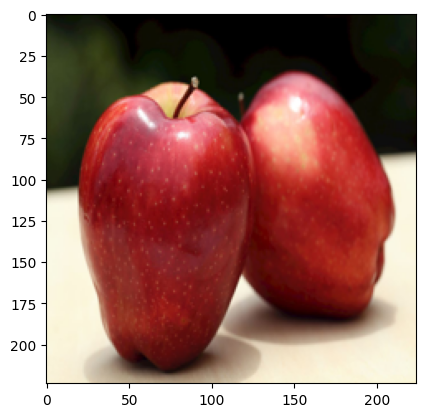

In [5]:
index = 29
plt.imshow(images[index].reshape(224, 224, 3))
print('This is', class_names[labels[index]], labels[index])

##Flatten image

In [6]:
def flatten_image(images, labels):
  flatten_img = []
  flatten_labels = []

  for img, label in zip(images, labels):
    flatten_img.append(img.flatten())
    flatten_labels.append(label)

  flatten_img = array(flatten_img)
  flatten_labels = array(flatten_labels)
  
  return flatten_img, flatten_labels

In [80]:
flatten_images_test, flatten_labels_test = flatten_image(images_test, labels_test)
print(flatten_images_test.shape)
print(flatten_labels_test)

(193, 150528)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7]


In [70]:
flatten_images, flatten_labels = flatten_image(images, labels)
print(flatten_images.shape)
print(flatten_labels)

(882, 150528)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 

#Use pretrained model as an feature extractor

In [8]:
def cnn_extract_feature(model_path, images):
  pretrained_model = keras.models.load_model(model_path)
  feature_extractor = Model(inputs=pretrained_model.inputs, outputs=pretrained_model.layers[-2].output)
  feature_matrix = feature_extractor.predict(images)

  return feature_matrix

In [9]:
model_path = '/content/drive/MyDrive/FruitDataAI/Model/2023-05-2222_5_model.h5'

feature_matrix = cnn_extract_feature(model_path, images)
print(feature_matrix.shape)

28/28 [==============================] - 17s 206ms/step
(882, 512)


In [81]:
feature_matrix_test = cnn_extract_feature(model_path, images_test)

7/7 [==============================] - 1s 127ms/step


In [82]:
print(feature_matrix_test.shape)

(193, 512)


In [10]:
pickle.dump(feature_matrix, open('/content/drive/MyDrive/FruitDataAI/Model/Feature_matrix.pkl', 'wb'))

In [11]:
print(max(feature_matrix[0]))

214.04633


In [12]:
feature_matrix = pickle.load(open('/content/drive/MyDrive/FruitDataAI/Model/Feature_matrix.pkl', 'rb'))

#SVM

In [13]:
def show_result(results, key, percent, unit):
  print('{:14s} {:s}'.format('', key))
  print('{:>14s} {:.2f}'.format('Mean: ', np.mean(results[key]) * percent) + unit)
  print('{:>14s} {:.2f}'.format('Highest: ', max(results[key]) * percent) + unit)
  print('{:>14s} {:.2f}'.format('Lowest: ', min(results[key]) * percent) + unit)
  print()

In [14]:
def evaluate_svm_model(kernel, images, labels, *, C=1, G='scale'):
  KFold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

  clf = svm.SVC(kernel='rbf', C = C, gamma=G)

  results = cross_validate(clf, images, labels, cv=KFold, 
                           scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'],
                           return_estimator=True, return_train_score=True, n_jobs=-1)

  for key in results.keys():
    if(key == 'estimator'):
      continue
    if(key == 'fit_time' or key == 'score_time'):
      show_result(results, key, 1, 's')
    else:
      show_result(results, key, 100, '%')

  return results

In [15]:
results = evaluate_svm_model('rbf', feature_matrix, flatten_labels, C=1, G=1e-5)

               fit_time
        Mean:  0.08s
     Highest:  0.09s
      Lowest:  0.06s

               score_time
        Mean:  0.04s
     Highest:  0.05s
      Lowest:  0.02s

               test_accuracy
        Mean:  83.78%
     Highest:  88.14%
      Lowest:  80.11%

               train_accuracy
        Mean:  86.17%
     Highest:  87.54%
      Lowest:  85.67%

               test_precision_micro
        Mean:  83.78%
     Highest:  88.14%
      Lowest:  80.11%

               train_precision_micro
        Mean:  86.17%
     Highest:  87.54%
      Lowest:  85.67%

               test_recall_micro
        Mean:  83.78%
     Highest:  88.14%
      Lowest:  80.11%

               train_recall_micro
        Mean:  86.17%
     Highest:  87.54%
      Lowest:  85.67%

               test_f1_micro
        Mean:  83.78%
     Highest:  88.14%
      Lowest:  80.11%

               train_f1_micro
        Mean:  86.17%
     Highest:  87.54%
      Lowest:  85.67%



In [16]:
def get_gamma(images):
  return 1/(images.shape[1]*images.var())

print(get_gamma(flatten_images))

1.2956687799231546e-09


In [17]:
def find_best_params(images, labels, parameter_candidates):
  KFold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
  clf = GridSearchCV(estimator=SVC(probability=True), param_grid=parameter_candidates, scoring='accuracy', cv=KFold, n_jobs=-1)
  clf.fit(images, labels)

  return clf

In [49]:
parameter_candidates = {'C': [10], 
                        'gamma': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5 ], 
                        'kernel': ['rbf']}

clf_svm = find_best_params(feature_matrix, labels, parameter_candidates)

print('Best score:', clf_svm.best_score_)
print('Best Gamma:', clf_svm.best_estimator_.gamma)
print('Best C:', clf_svm.best_estimator_.C)
print('Best param:', clf_svm.best_params_)

Best score: 0.8491782229070365
Best Gamma: 1e-05
Best C: 10
Best param: {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}


#KNN

##Build and Train

In [19]:
clf = KNeighborsClassifier(n_neighbors=1)

KFold = StratifiedKFold(n_splits=8, random_state=42, shuffle=True)

scores = cross_validate(clf, feature_matrix, flatten_labels, cv=KFold, scoring='accuracy', return_estimator=True, return_train_score=True)

fit_times = scores['fit_time']
score_times = scores['score_time']
estimators = scores['estimator']
train_scores = scores['train_score'] * 100
test_scores = scores['test_score'] * 100

print('{:14s} {:20s} {:20s} {:15s} {:15s}'.format('', 'Training scores', 'Testing scores', 'Fit time', 'Score time'))

for i in range(8):
  print('{:13s} {:10.2f}{:<} {:18.2f}{:<} {:17.2f} {:16.2f}'.format('Experiment ' + str(i + 1) + ':', train_scores[i], '%', test_scores[i], '%', fit_times[i], score_times[i]))

print('------------------------------------------------------------------------------------------')
print('{:>14s} {:9.2f}% {:18.2f}% {:17.2f} {:16.2f}'.format('Mean: ', np.mean(train_scores), np.mean(test_scores), np.mean(fit_times), np.mean(score_times)))
print('{:>14s} {:9.2f}% {:18.2f}% {:17.2f} {:16.2f}'.format('Highest: ', max(train_scores), max(test_scores), max(fit_times), max(score_times)))
print('{:>14s} {:9.2f}% {:18.2f}% {:17.2f} {:16.2f}'.format('Lowest: ', min(train_scores), min(test_scores), min(fit_times), min(score_times)))

# scores = cross_val_score(clf, dataset, labels, cv=KFold)
# scores = scores * 100

               Training scores      Testing scores       Fit time        Score time     
Experiment 1:     100.00%              82.88%              0.00             0.15
Experiment 2:     100.00%              82.88%              0.00             0.01
Experiment 3:     100.00%              84.55%              0.00             0.02
Experiment 4:     100.00%              74.55%              0.00             0.01
Experiment 5:     100.00%              80.91%              0.00             0.01
Experiment 6:     100.00%              87.27%              0.00             0.02
Experiment 7:     100.00%              72.73%              0.00             0.01
Experiment 8:     100.00%              80.00%              0.00             0.01
------------------------------------------------------------------------------------------
        Mean:     100.00%              80.72%              0.00             0.03
     Highest:     100.00%              87.27%              0.00             0.15
      Lowe

##Find the best value of K

In [21]:
error = []

# Calculating error for K values between 1 and 40
for train_index, test_index in KFold.split(flatten_images, labels):
  X_train, X_test = flatten_images[train_index], flatten_images[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  for i in range(1, 40):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)
      error.append(np.mean(pred_i != y_test))
  break

Text(0, 0.5, 'Mean Error')

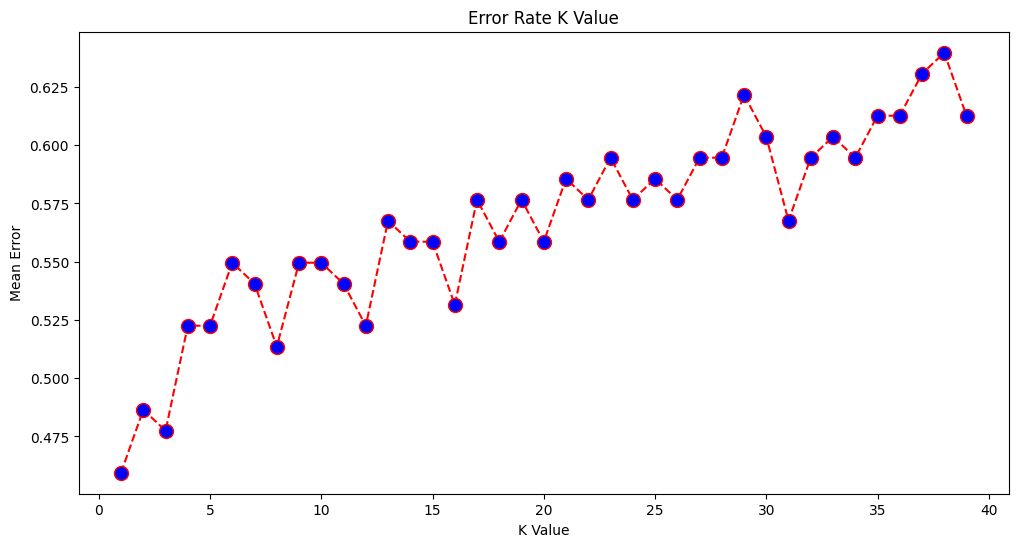

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
# plt.savefig('/content/drive/MyDrive/My_works/Face recognition/KNN/ErrorRateKValue.png')
# plt.savefig('/content/drive/MyDrive/My_works/Face recognition/KNN/ErrorRateKValue_cnn.png')

#Evaluation

In [52]:
avg = 'macro'

**KNN**

In [53]:
predicted_labels_KNN = estimators[3].predict(feature_matrix)
print(classification_report(labels, predicted_labels_KNN, target_names=fruits))
print("Accuracy: ", metrics.accuracy_score(labels, predicted_labels_KNN))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(labels, predicted_labels_KNN, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(labels, predicted_labels_KNN, average=avg))

print("F1-Score: ", metrics.f1_score(labels, predicted_labels_KNN,average=avg))

                 precision    recall  f1-score   support

      00_Tao_My       0.99      0.96      0.97       101
      01_Tao_TQ       0.98      0.99      0.99       145
   02_Nho_Do_VN       0.96      0.98      0.97       101
 03_Nho_Xanh_VN       0.94      0.97      0.95       109
   04_Nho_Do_TQ       0.98      0.96      0.97       112
 05_Nho_Xanh_TQ       0.97      0.95      0.96        96
06_Khoai_Tay_VN       0.97      0.95      0.96       123
07_Khoai_Tay_TQ       0.95      0.98      0.96        95

       accuracy                           0.97       882
      macro avg       0.97      0.97      0.97       882
   weighted avg       0.97      0.97      0.97       882

Accuracy:  0.9682539682539683
Precision:  0.9677902469196706
Recall:  0.9674519077552463
F1-Score:  0.9674541241974801


In [83]:
predicted_labels_KNN = estimators[3].predict(feature_matrix_test)
print(classification_report(labels_test, predicted_labels_KNN, target_names=fruits))
print("Accuracy: ", metrics.accuracy_score(labels_test, predicted_labels_KNN))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(labels_test, predicted_labels_KNN, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(labels_test, predicted_labels_KNN, average=avg))

print("F1-Score: ", metrics.f1_score(labels_test, predicted_labels_KNN,average=avg))

                 precision    recall  f1-score   support

      00_Tao_My       1.00      1.00      1.00        24
      01_Tao_TQ       1.00      1.00      1.00        25
   02_Nho_Do_VN       0.71      1.00      0.83        22
 03_Nho_Xanh_VN       0.89      1.00      0.94        33
   04_Nho_Do_TQ       0.88      0.68      0.77        22
 05_Nho_Xanh_TQ       0.75      0.43      0.55         7
06_Khoai_Tay_VN       0.73      0.92      0.81        24
07_Khoai_Tay_TQ       0.92      0.64      0.75        36

       accuracy                           0.87       193
      macro avg       0.86      0.83      0.83       193
   weighted avg       0.88      0.87      0.86       193

Accuracy:  0.8652849740932642
Precision:  0.8609069482195668
Recall:  0.8332431457431457
F1-Score:  0.8320805390322866


**SVM**

In [54]:
predicted_labels_SVM = clf_svm.predict(feature_matrix)
print(classification_report(labels, predicted_labels_SVM, target_names=fruits))
print("Accuracy: ", metrics.accuracy_score(labels, predicted_labels_SVM))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(labels, predicted_labels_SVM, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(labels, predicted_labels_SVM, average=avg))

print("F1-Score: ", metrics.f1_score(labels, predicted_labels_SVM,average=avg))

                 precision    recall  f1-score   support

      00_Tao_My       0.97      0.95      0.96       101
      01_Tao_TQ       0.94      0.98      0.96       145
   02_Nho_Do_VN       0.87      0.87      0.87       101
 03_Nho_Xanh_VN       0.86      0.81      0.83       109
   04_Nho_Do_TQ       0.87      0.88      0.88       112
 05_Nho_Xanh_TQ       0.78      0.80      0.79        96
06_Khoai_Tay_VN       0.90      0.93      0.92       123
07_Khoai_Tay_TQ       0.91      0.86      0.89        95

       accuracy                           0.89       882
      macro avg       0.89      0.89      0.89       882
   weighted avg       0.89      0.89      0.89       882

Accuracy:  0.891156462585034
Precision:  0.8882747992156008
Recall:  0.8855538800472653
F1-Score:  0.8866085915554871


In [85]:
predicted_labels_SVM = clf_svm.predict(feature_matrix_test)
print(classification_report(labels_test, predicted_labels_SVM, target_names=fruits))
print("Accuracy: ", metrics.accuracy_score(labels_test, predicted_labels_SVM))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(labels_test, predicted_labels_SVM, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(labels_test, predicted_labels_SVM, average=avg))

print("F1-Score: ", metrics.f1_score(labels_test, predicted_labels_SVM,average=avg))

                 precision    recall  f1-score   support

      00_Tao_My       0.96      1.00      0.98        24
      01_Tao_TQ       1.00      0.96      0.98        25
   02_Nho_Do_VN       0.64      0.82      0.72        22
 03_Nho_Xanh_VN       0.91      0.97      0.94        33
   04_Nho_Do_TQ       0.75      0.68      0.71        22
 05_Nho_Xanh_TQ       0.50      0.43      0.46         7
06_Khoai_Tay_VN       0.78      0.88      0.82        24
07_Khoai_Tay_TQ       0.93      0.72      0.81        36

       accuracy                           0.84       193
      macro avg       0.81      0.81      0.80       193
   weighted avg       0.85      0.84      0.84       193

Accuracy:  0.844559585492228
Precision:  0.8091865079365079
Recall:  0.8069363275613276
F1-Score:  0.8040267164558131


In [25]:
model_CNN = keras.models.load_model('/content/drive/MyDrive/FruitDataAI/Model/2023-05-2222_5_model.h5')

In [26]:
predicted_labels_CNN = model_CNN.predict(images)

28/28 [==============================] - 3s 123ms/step


**CNN**

train

In [55]:
prdCNN = []
for i in predicted_labels_CNN:
  prdCNN.append(np.argmax(i))
print(classification_report(labels, prdCNN, target_names=fruits))
print("Accuracy: ", metrics.accuracy_score(labels, prdCNN))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(labels, prdCNN, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(labels, prdCNN, average=avg))

print("F1-Score: ", metrics.f1_score(labels, prdCNN,average=avg))

                 precision    recall  f1-score   support

      00_Tao_My       0.98      0.87      0.92       101
      01_Tao_TQ       0.81      0.97      0.88       145
   02_Nho_Do_VN       0.62      0.91      0.74       101
 03_Nho_Xanh_VN       0.83      0.57      0.67       109
   04_Nho_Do_TQ       0.89      0.69      0.77       112
 05_Nho_Xanh_TQ       0.77      0.68      0.72        96
06_Khoai_Tay_VN       0.83      0.94      0.89       123
07_Khoai_Tay_TQ       0.89      0.78      0.83        95

       accuracy                           0.81       882
      macro avg       0.83      0.80      0.80       882
   weighted avg       0.83      0.81      0.81       882

Accuracy:  0.8106575963718821
Precision:  0.8265717536028891
Recall:  0.8012524353779333
F1-Score:  0.8032096797979937


test

In [86]:
predicted_labels_CNN = model_CNN.predict(images_test)
prdCNN = []
for i in predicted_labels_CNN:
  prdCNN.append(np.argmax(i))
print(classification_report(labels_test, prdCNN, target_names=fruits))
print("Accuracy: ", metrics.accuracy_score(labels_test, prdCNN))

#Model precision: Số mẫu được gán nhãn alpha chính xác/tổng số mẫu được gán nhãn là alpha
print("Precision: ", metrics.precision_score(labels_test, prdCNN, average=avg))

#Model recall: Số mẫu được gán nhãn alpha chính xác/Tổng số mẫu thực sự là alpha
print("Recall: ", metrics.recall_score(labels_test, prdCNN, average=avg))

print("F1-Score: ", metrics.f1_score(labels_test, prdCNN,average=avg))

7/7 [==============================] - 1s 127ms/step
                 precision    recall  f1-score   support

      00_Tao_My       1.00      1.00      1.00        24
      01_Tao_TQ       0.93      1.00      0.96        25
   02_Nho_Do_VN       0.60      0.95      0.74        22
 03_Nho_Xanh_VN       0.94      0.91      0.92        33
   04_Nho_Do_TQ       0.81      0.59      0.68        22
 05_Nho_Xanh_TQ       0.75      0.43      0.55         7
06_Khoai_Tay_VN       0.69      0.92      0.79        24
07_Khoai_Tay_TQ       0.96      0.61      0.75        36

       accuracy                           0.83       193
      macro avg       0.83      0.80      0.80       193
   weighted avg       0.86      0.83      0.83       193

Accuracy:  0.8290155440414507
Precision:  0.8337434581320451
Recall:  0.8013618326118326
F1-Score:  0.7978249449034462


# **Test**

In [28]:
img_test = array(Image.open('/content/drive/MyDrive/FruitDataAI/TestingData/0001TAOMY/t11.jpg').resize((224, 224))).reshape((1,224,224,3))
#img_flatten = img_test.flatten()

In [29]:
type(img_test)

numpy.ndarray

In [30]:
def cnn_extract_feature(model_path, images):
  pretrained_model = keras.models.load_model(model_path)
  feature_extractor = Model(inputs=pretrained_model.inputs, outputs=pretrained_model.layers[-2].output)
  feature_matrix = feature_extractor.predict(images)

  return feature_matrix

In [31]:
model_path = '/content/drive/MyDrive/FruitDataAI/Model/2023-05-2222_5_model.h5'
feature = cnn_extract_feature(model_path, img_test)

1/1 [==============================] - 1s 723ms/step


In [32]:
feature.shape

(1, 512)

In [33]:
predicted_labels = estimators[3].predict(feature)

In [34]:
predicted_labels

array([0])

In [35]:
fruits

['00_Tao_My',
 '01_Tao_TQ',
 '02_Nho_Do_VN',
 '03_Nho_Xanh_VN',
 '04_Nho_Do_TQ',
 '05_Nho_Xanh_TQ',
 '06_Khoai_Tay_VN',
 '07_Khoai_Tay_TQ']

In [36]:
pred_test = clf_svm.predict(feature)

In [37]:
pred_test[0]

0

In [38]:
fruits[pred_test[0]]

'00_Tao_My'

In [39]:
ts = clf_svm.predict_proba(feature)
ts

array([[0.97521017, 0.00323973, 0.00355689, 0.00433786, 0.00243433,
        0.00665118, 0.0021343 , 0.00243554]])

In [40]:
max(ts[0])

0.9752101690629897

# **Save Model**

In [41]:
from datetime import date
today = date.today()
str(today)

'2023-05-22'

In [42]:
model = pickle.dump(clf_svm, open('/content/drive/MyDrive/FruitDataAI/Model/modelSVM'+str(today)+'.sav', 'wb'))

In [43]:
pickle.dump(estimators[3], open('/content/drive/MyDrive/FruitDataAI/Model/modelKNN'+str(today)+'.sav', 'wb'))

In [44]:
loaded_model = pickle.load(open('/content/drive/MyDrive/FruitDataAI/Model/modelKNN2023-05-22.sav', 'rb'))

In [45]:
pre = loaded_model.predict(feature)

In [46]:
pre

array([0])

In [47]:
feature

array([[  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      , 402.99408 ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.